<h2 align=center>Exploratory Data Analysis With Python and Pandas</h2>

### About the Dataset

Link to data source: https://www.kaggle.com/aungpyaeap/supermarket-sales

**Context**
The growth of supermarkets in most populated cities are increasing and market competitions are also high. The dataset is one of the historical sales of supermarket company which has recorded in 3 different branches for 3 months data.

**Data Dictionary**
1. ***Invoice id:*** Computer generated sales slip invoice identification number
2. ***Branch:*** Branch of supercenter (3 branches are available identified by A, B and C).
3. ***City:*** Location of supercenters
4. ***Customer type:*** Type of customers, recorded by Members for customers using member card and Normal for without member card.
5. ***Gender:*** Gender type of customer
6. ***Product line:*** General item categorization groups - Electronic accessories, Fashion accessories, Food and beverages, Health and beauty, Home and lifestyle, Sports and travel
7. ***Unit price:*** Price of each product in USD
8. ***Quantity:*** Number of products purchased by customer
9. ***Tax:*** 5% tax fee for customer buying
10. ***Total:*** Total price including tax
11. ***Date:*** Date of purchase (Record available from January 2019 to March 2019)
12. ***Time:*** Purchase time (10am to 9pm)
13. ***Payment:*** Payment used by customer for purchase (3 methods are available – Cash, Credit card and Ewallet)
14. ***COGS:*** Cost of goods sold
15. ***Gross margin percentage:*** Gross margin percentage
16. ***Gross income:*** Gross income
17. ***Rating:*** Customer stratification rating on their overall shopping experience (On a scale of 1 to 10)

### Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import calmap
import pandas_profiling

%matplotlib inline

### Task 1: Initial Data Exploration

In [2]:
df = pd.read_csv('supermarket_sales.csv')

In [3]:
df.head(10)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7.0,26.1415,548.9715,1/5/19,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5.0,3.8200,80.2200,3/8/19,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7.0,16.2155,340.5255,3/3/19,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8.0,23.2880,489.0480,1/27/19,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7.0,30.2085,634.3785,2/8/19,10:37,Ewallet,604.17,4.761905,30.2085,5.3
5,699-14-3026,C,Naypyitaw,Normal,Male,Electronic accessories,85.39,7.0,29.8865,627.6165,3/25/19,18:30,Ewallet,597.73,4.761905,29.8865,4.1
6,355-53-5943,A,Yangon,Member,Female,NaN,68.84,6.0,20.6520,433.6920,2/25/19,14:36,Ewallet,413.04,4.761905,20.6520,5.8
7,315-22-5665,C,Naypyitaw,Normal,Female,NaN,73.56,10.0,36.7800,772.3800,2/24/19,11:38,Ewallet,735.60,4.761905,36.7800,8.0
8,665-32-9167,A,Yangon,Member,Female,NaN,36.26,2.0,3.6260,76.1460,1/10/19,17:15,Credit card,72.52,4.761905,3.6260,7.2
9,692-92-5582,B,Mandalay,Member,Female,NaN,54.84,3.0,8.2260,172.7460,2/20/19,13:27,Credit card,164.52,4.761905,8.2260,5.9


In [4]:
df.tail(10)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
993,690-01-6631,B,Mandalay,Normal,Male,Fashion accessories,NaN,10.0,8.7450,183.6450,2/22/19,18:35,Ewallet,174.90,4.761905,8.7450,6.6
994,652-49-6720,C,Naypyitaw,Member,Female,Electronic accessories,NaN,1.0,3.0475,63.9975,2/18/19,11:40,Ewallet,60.95,4.761905,3.0475,5.9
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,NaN,1.0,2.0175,42.3675,1/29/19,13:46,Ewallet,40.35,4.761905,2.0175,6.2
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,NaN,10.0,48.6900,1022.4900,3/2/19,17:16,Ewallet,973.80,4.761905,48.6900,4.4
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,NaN,1.0,1.5920,33.4320,2/9/19,13:22,Cash,31.84,4.761905,1.5920,7.7
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1.0,3.2910,69.1110,2/22/19,15:33,Cash,65.82,4.761905,3.2910,4.1
999,849-09-3807,A,Yangon,Member,Female,Fashion accessories,88.34,7.0,30.9190,649.2990,2/18/19,13:28,Cash,618.38,4.761905,30.9190,6.6
1000,849-09-3807,A,Yangon,Member,Female,Fashion accessories,88.34,7.0,30.9190,649.2990,2/18/19,13:28,Cash,618.38,4.761905,30.9190,6.6
1001,745-74-0715,A,Yangon,Normal,Male,Electronic accessories,NaN,2.0,5.8030,121.8630,3/10/19,20:46,Ewallet,116.06,4.761905,5.8030,8.8
1002,452-04-8808,B,Mandalay,Normal,Male,Electronic accessories,87.08,NaN,30.4780,640.0380,1/26/19,15:17,Cash,609.56,4.761905,30.4780,5.5


In [5]:
df.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

In [6]:
df.dtypes

Invoice ID                  object
Branch                      object
City                        object
Customer type               object
Gender                      object
Product line                object
Unit price                 float64
Quantity                   float64
Tax 5%                     float64
Total                      float64
Date                        object
Time                        object
Payment                     object
cogs                       float64
gross margin percentage    float64
gross income               float64
Rating                     float64
dtype: object

Alot of the columns are objct type. However, the Data column should be in datetime.

In [7]:
df['Date']

0        1/5/19
1        3/8/19
2        3/3/19
3       1/27/19
4        2/8/19
         ...   
998     2/22/19
999     2/18/19
1000    2/18/19
1001    3/10/19
1002    1/26/19
Name: Date, Length: 1003, dtype: object

These are strings. We want this to be in type datetime.

In [8]:
df['Date'] = pd.to_datetime(df['Date'])

In [9]:
df['Date']

0      2019-01-05
1      2019-03-08
2      2019-03-03
3      2019-01-27
4      2019-02-08
          ...    
998    2019-02-22
999    2019-02-18
1000   2019-02-18
1001   2019-03-10
1002   2019-01-26
Name: Date, Length: 1003, dtype: datetime64[ns]

It is convention to set the Date column as index for the dataframe.

In [10]:
df.set_index('Date', inplace=True)

In [11]:
df

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Time,Payment,cogs,gross margin percentage,gross income,Rating
Date,,,,,,,,,,,,,,,,
2019-01-05,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7.0,26.1415,548.9715,13:08,Ewallet,522.83,4.761905,26.1415,9.1
2019-03-08,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5.0,3.8200,80.2200,10:29,Cash,76.40,4.761905,3.8200,9.6
2019-03-03,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7.0,16.2155,340.5255,13:23,Credit card,324.31,4.761905,16.2155,7.4
2019-01-27,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8.0,23.2880,489.0480,20:33,Ewallet,465.76,4.761905,23.2880,8.4
2019-02-08,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7.0,30.2085,634.3785,10:37,Ewallet,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-02-22,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1.0,3.2910,69.1110,15:33,Cash,65.82,4.761905,3.2910,4.1
2019-02-18,849-09-3807,A,Yangon,Member,Female,Fashion accessories,88.34,7.0,30.9190,649.2990,13:28,Cash,618.38,4.761905,30.9190,6.6
2019-02-18,849-09-3807,A,Yangon,Member,Female,Fashion accessories,88.34,7.0,30.9190,649.2990,13:28,Cash,618.38,4.761905,30.9190,6.6


So now we can proceed to calculating some quick summary
statistics about the column by using df.describe(). What that does is for every numeric column
in the data sets for every float column, it calculates summary statistics such as count
mean standard deviation, 25th percentile and so
on and so forth.


In [12]:
df.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,996.000000,983.000000,1003.000000,1003.000000,1003.000000,1.003000e+03,1003.000000,1003.000000
mean,55.764568,5.501526,15.400368,323.407726,308.007358,4.761905e+00,15.400368,6.972682
std,26.510165,2.924673,11.715192,246.019028,234.303836,8.886215e-16,11.715192,1.717647
min,10.080000,1.000000,0.508500,10.678500,10.170000,4.761905e+00,0.508500,4.000000
25%,33.125000,3.000000,5.894750,123.789750,117.895000,4.761905e+00,5.894750,5.500000
50%,55.420000,5.000000,12.096000,254.016000,241.920000,4.761905e+00,12.096000,7.000000
75%,78.085000,8.000000,22.539500,473.329500,450.790000,4.761905e+00,22.539500,8.500000
max,99.960000,10.000000,49.650000,1042.650000,993.000000,4.761905e+00,49.650000,10.000000


### Task 2: Univariate Analysis

Exploratory data
analysis or "EDA"
is usually not a step A through Z sort of process.
What do I mean by that?
So different data sets especially different tabular data sets
are quite different from each other, and the way we approach
them or explore them is going to be different.
So the way I like to approach any new dataset is to pose
a question and then do the resulting analyses.


**Question 1:** What does the distribution of customer ratings looks like? Is it skewed?

C:\Users\user\AppData\Roaming\jupyterlab-desktop\jlab_server\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Rating', ylabel='Density'>

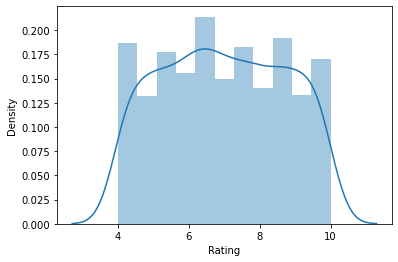

In [13]:
# So, in order to answer this question, we can use the Seaborn
# library to plot out that distribution.
sns.distplot(df['Rating'])



Now a few words about this distribution.
It looks like a uniform distribution, which means none
off the rating numbers particularly spikes out.
It looks like there's an equal chance someone rated
4 or 10 or 6 or any number in between.
Um, if we wanted to plot the mean rating in this graph, we
can simply do plt.axvline()


C:\Users\user\AppData\Roaming\jupyterlab-desktop\jlab_server\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


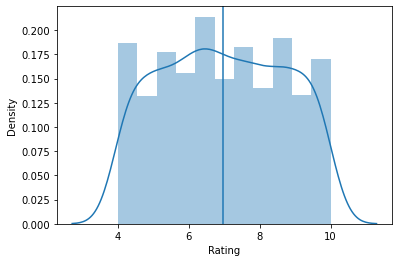

In [14]:
sns.distplot(df['Rating'])
plt.axvline(x=np.mean(df['Rating']))

we get a line representing the mean,
which happens to be a number between six and eight.
And if we wanted to further style this, we 
can make it a distinct color.


C:\Users\user\AppData\Roaming\jupyterlab-desktop\jlab_server\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


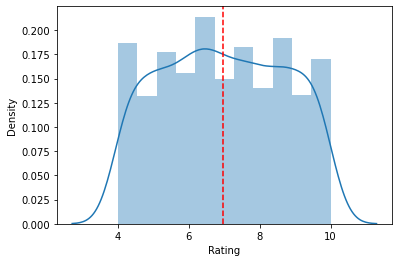

In [15]:
sns.distplot(df['Rating'])
plt.axvline(x=np.mean(df['Rating']), c = 'red', ls ='--')

Now we can clearly see where the mean falls.
Now, if we wanted to plot the lines for the
25th and 75th percentile, you can follow the same logic.


C:\Users\user\AppData\Roaming\jupyterlab-desktop\jlab_server\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


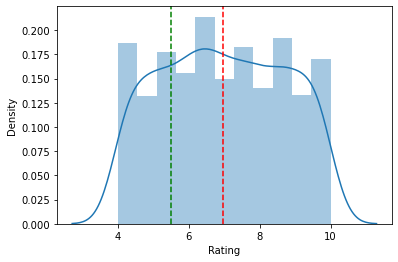

In [16]:
sns.distplot(df['Rating'])
plt.axvline(x=np.mean(df['Rating']), c = 'red', ls ='--')
plt.axvline(x=np.percentile(df['Rating'], 25), c = 'green', ls='--')

Similarly, we can do this for the 75th percentile.
We can just change the number 25 75 and we have the
75th percentile line.


C:\Users\user\AppData\Roaming\jupyterlab-desktop\jlab_server\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


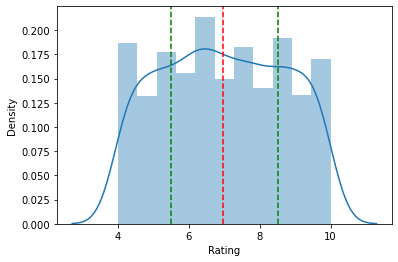

In [17]:
sns.distplot(df['Rating'])
plt.axvline(x=np.mean(df['Rating']), c = 'red', ls ='--')
plt.axvline(x=np.percentile(df['Rating'], 25), c = 'green', ls='--')
plt.axvline(x=np.percentile(df['Rating'], 75), c = 'green', ls='--')

And if we wanted to, we could give these each a label so we
can simply extend.

C:\Users\user\AppData\Roaming\jupyterlab-desktop\jlab_server\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


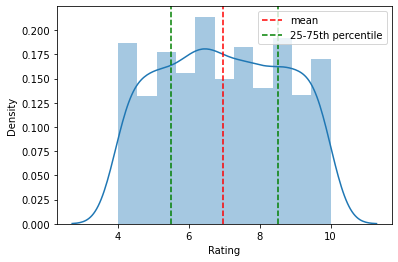

In [18]:
sns.distplot(df['Rating'])
plt.axvline(x=np.mean(df['Rating']), c = 'red', ls ='--', label = 'mean')
plt.axvline(x=np.percentile(df['Rating'], 25), c = 'green', ls='--', label = '25-75th percentile')
plt.axvline(x=np.percentile(df['Rating'], 75), c = 'green', ls='--')
plt.legend()

This graph sort of answered the question.
The distribution off user readings looks relatively uniform,
and there doesn't seem to be any skew in the left or right
direction.

So, if we're curious about the other numerical variables
and they're following distributions, there's an easy way we can do 
all of them at once.


array([[<AxesSubplot:title={'center':'Unit price'}>,
        <AxesSubplot:title={'center':'Quantity'}>,
        <AxesSubplot:title={'center':'Tax 5%'}>],
       [<AxesSubplot:title={'center':'Total'}>,
        <AxesSubplot:title={'center':'cogs'}>,
        <AxesSubplot:title={'center':'gross margin percentage'}>],
       [<AxesSubplot:title={'center':'gross income'}>,
        <AxesSubplot:title={'center':'Rating'}>, <AxesSubplot:>]],
      dtype=object)

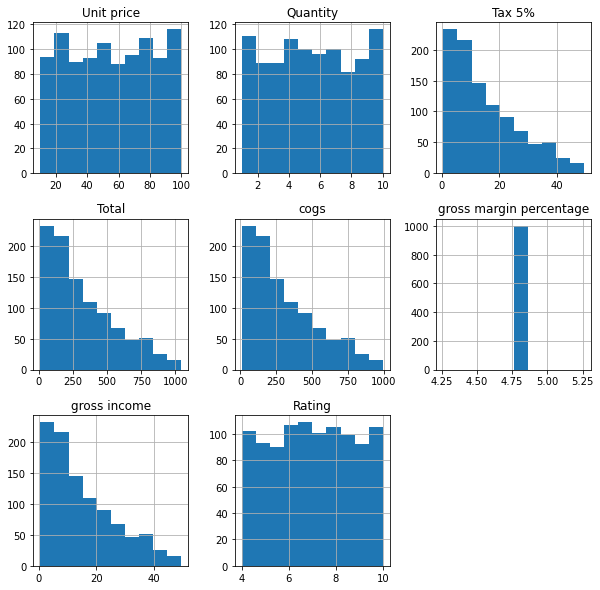

In [19]:
df.hist(figsize=(10,10))

So we can see the unit
price is uniformly distributed .
Likewise, the tax has a right skew, which means most
of the tax collected falls between zero and 20.
But there are a few cases where it's over 40.
The gross margin percentages a constant value, which is why
doesn't have much of a distribution toe?
The cost of goods sold in total and gross income.
They're highly correlated variable.
So we would not be surprised to see that they all followed
almost identical distributions.
And the user rating, as we've seen before, has a uniform
distribution.


**Question 2:** Do aggregate sales numbers differ by much between branches?

C:\Users\user\AppData\Roaming\jupyterlab-desktop\jlab_server\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Branch', ylabel='count'>

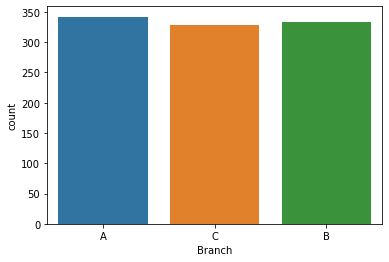

In [20]:
sns.countplot(df['Branch'])

so we can see essentially what
this says is ah, Branch A has around 350 sales
and so on. To get the exact numbers:


In [21]:
df['Branch'].value_counts()

A    342
B    333
C    328
Name: Branch, dtype: int64

They don't differ by much.

We can use countplot for just about any
categorical variable.
So if you wanted to see, for example, um, differences
in payment methods.
So how many users use certain payment method versus other
methods?


C:\Users\user\AppData\Roaming\jupyterlab-desktop\jlab_server\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Payment', ylabel='count'>

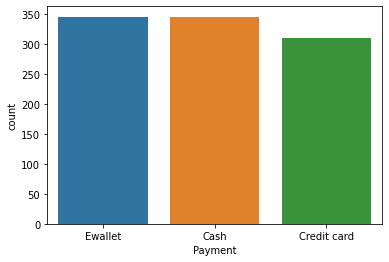

In [22]:
sns.countplot(df['Payment'])

We can see E wallet seems to be the most popular form
of payment, and credit card, surprisingly, seems to be the
least popular form of payment for customers.


Now, just to summarize, we've looked at univariate
analysis, which means looking at one variable at a time.

### Task 3: Bivariate Analysis

**Question 3:** Is there a relationship between gross income and customer ratings?

C:\Users\user\AppData\Roaming\jupyterlab-desktop\jlab_server\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Rating', ylabel='gross income'>

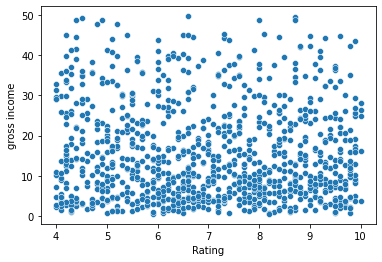

In [23]:
sns.scatterplot(df['Rating'], df['gross income'])

we're looking at how ratings are influenced by gross
income and it doesn't look like there is any influence
at all, there doesn't seem to be
a relationship between customer rating and gross income.
And in fact, we wanted to see the trend line.
We can simply replace scatter plot here to be a regression 
plot (regplot).

C:\Users\user\AppData\Roaming\jupyterlab-desktop\jlab_server\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Rating', ylabel='gross income'>

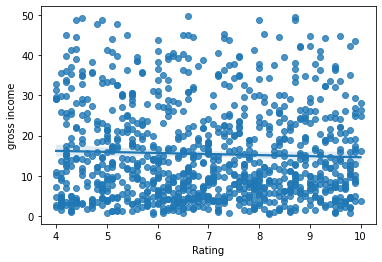

In [24]:
sns.regplot(df['Rating'], df['gross income'])

So you can see the trend line.
It's pretty flat, which means there doesn't seem to be
any relationship.

Before I move on to question 4, I am interested in seeing
if there is a relationship between Branch and gross income.
I want to see if different branches of the supermarket chain
show different average gross income.

<AxesSubplot:xlabel='Branch', ylabel='gross income'>

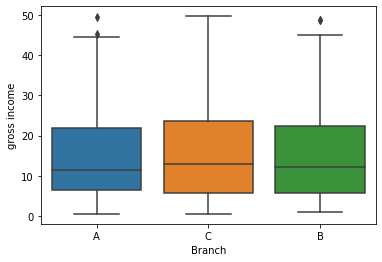

In [25]:
sns.boxplot(x = df['Branch'], y=df['gross income'])

We see for branch A 
the gross income - the median line is 
about 10 below 20. for Branch C
the median gross income is slightly higher and on branch
B it is about the same as brunch A.
So no, There doesn't seem to be much variation in gross
income between the different branches, at least at the, uh,
aggregate level.
So now we might be interested in seeing if there is
a relationship between gender and gross income.


<AxesSubplot:xlabel='Gender', ylabel='gross income'>

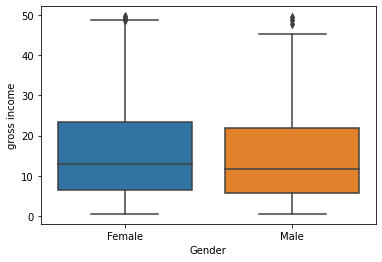

In [26]:
sns.boxplot(x = df['Gender'], y=df['gross income'])

and it looks like.
the men and women in this data set spend
about the same
At 75th percentile, women spend higher
than men.
but on average, they seem to be pretty similar.


So now we can proceed to look at question number four.
Is there a noticeable time trend in gross income?
And to do that, we can use seaborn's
line plot
So sns.lineplot()
Now, we cannot use the data frame, as it is for this particular
plot. Because, as we can see, dates are repeated
because there can be multiple customers at any given date.
So we have to aggregate the data.


In [27]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Time,Payment,cogs,gross margin percentage,gross income,Rating
Date,,,,,,,,,,,,,,,,
2019-01-05,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7.0,26.1415,548.9715,13:08,Ewallet,522.83,4.761905,26.1415,9.1
2019-03-08,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5.0,3.8200,80.2200,10:29,Cash,76.40,4.761905,3.8200,9.6
2019-03-03,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7.0,16.2155,340.5255,13:23,Credit card,324.31,4.761905,16.2155,7.4
2019-01-27,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8.0,23.2880,489.0480,20:33,Ewallet,465.76,4.761905,23.2880,8.4
2019-02-08,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7.0,30.2085,634.3785,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [28]:
df.groupby(df.index).mean()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
Date,,,,,,,,
2019-01-01,54.995833,6.454545,18.830083,395.431750,376.601667,4.761905,18.830083,6.583333
2019-01-02,44.635000,6.000000,11.580375,243.187875,231.607500,4.761905,11.580375,6.050000
2019-01-03,59.457500,4.625000,12.369813,259.766062,247.396250,4.761905,12.369813,8.112500
2019-01-04,51.743333,5.333333,12.886417,270.614750,257.728333,4.761905,12.886417,6.516667
2019-01-05,61.636667,4.583333,14.034458,294.723625,280.689167,4.761905,14.034458,7.433333
...,...,...,...,...,...,...,...,...
2019-03-26,42.972308,4.000000,7.188692,150.962538,143.773846,4.761905,7.188692,6.623077
2019-03-27,56.841000,4.500000,13.822950,290.281950,276.459000,4.761905,13.822950,6.760000
2019-03-28,45.525000,4.800000,10.616200,222.940200,212.324000,4.761905,10.616200,7.050000


**Question 4:** Is there a noticeable time trend in gross income?

<AxesSubplot:xlabel='Date', ylabel='gross income'>

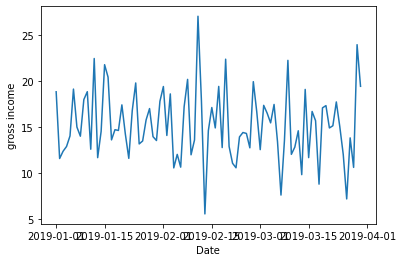

In [29]:
sns.lineplot(x = df.groupby(df.index).mean().index,
             y = df.groupby(df.index).mean()['gross income'])

So we don't notice any time trend in this graph.
It looks like it varies around the same mean, Um, there are
some days where there are high numbers in gross income.
Some days were very low gross income, so there doesn't seem
to be any particular trend.
And this may be because we're looking only at three months
worth of data.
Um, but well, that's the data we're working with.


If we wanted to plot all the bivariate relationships
possible, there is a way to do that in Seaborn, and that is to use
the pair plot function. But this is quite time consuming and recommended to use only on small dataset.


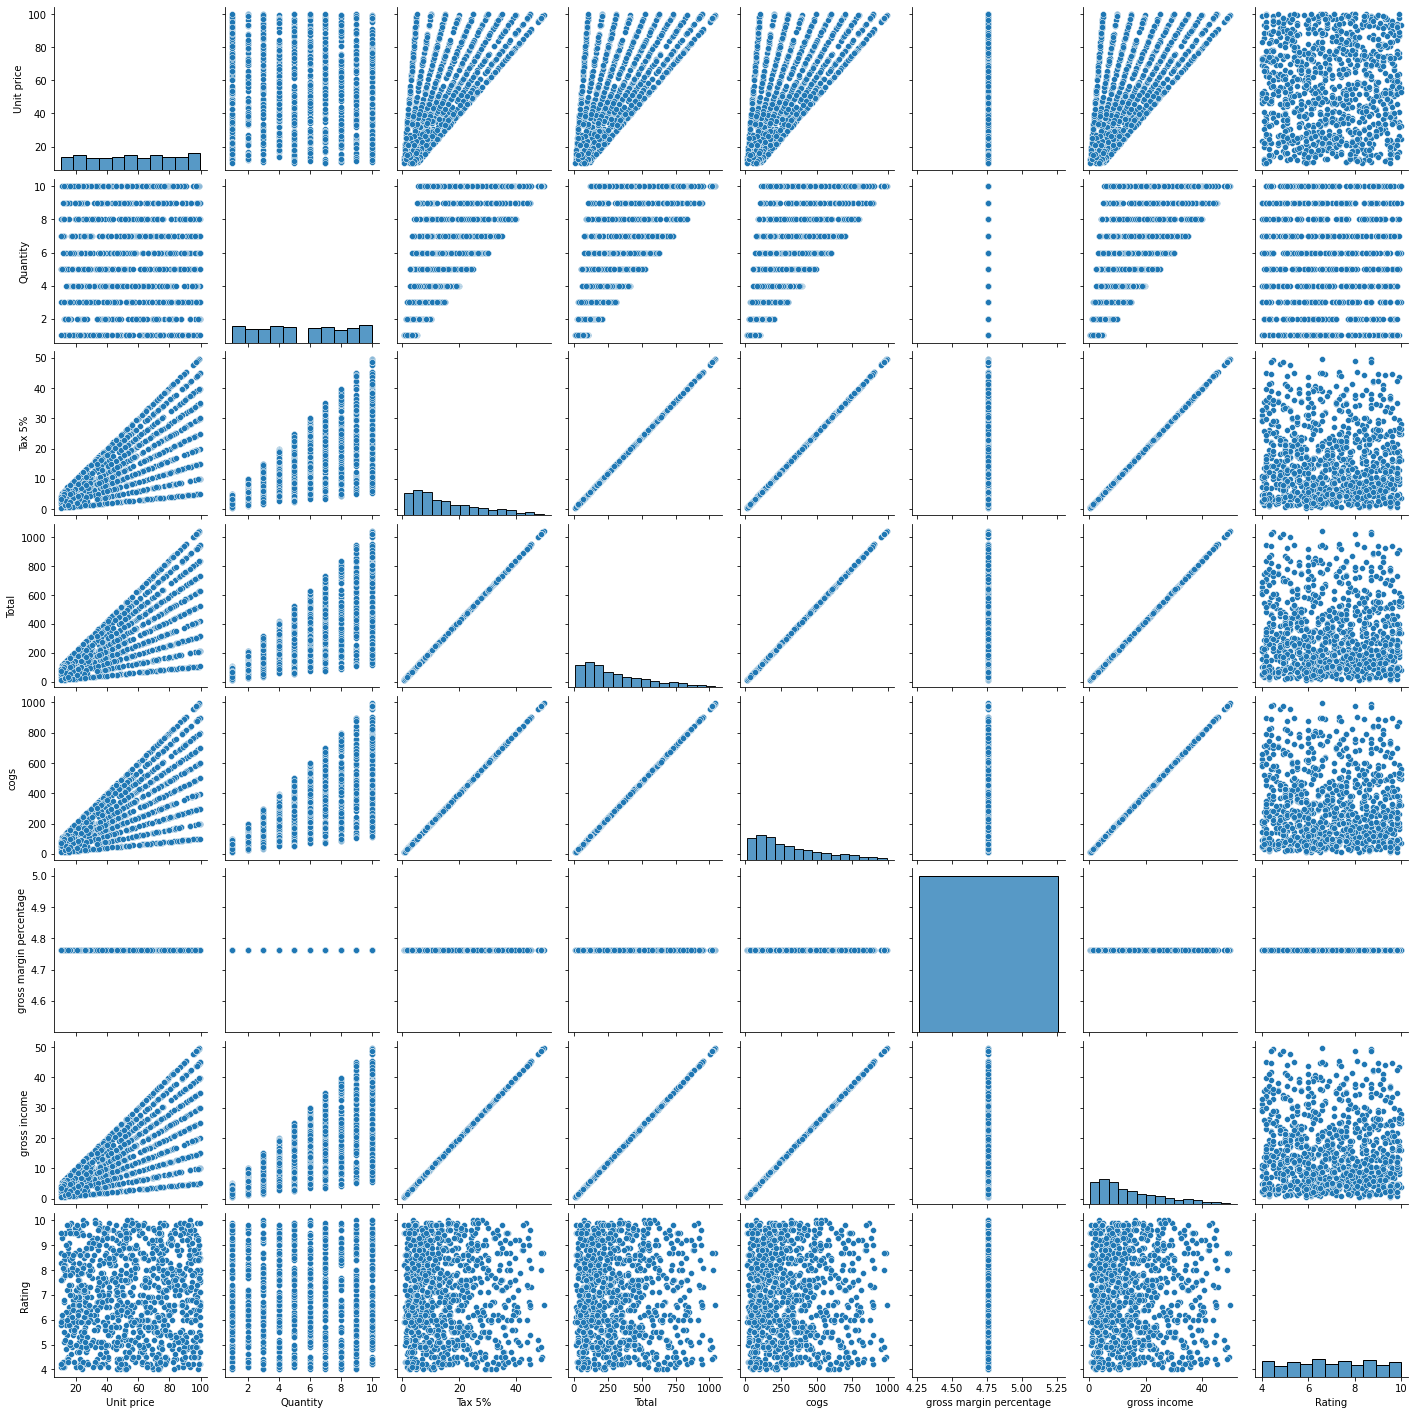

In [30]:
df_v2 = pd.read_csv('supermarket_sales.csv')

sns.pairplot(df_v2)

### Task 4: Dealing With Duplicate Rows and Missing Values

In [31]:
df.duplicated()

Date
2019-01-05    False
2019-03-08    False
2019-03-03    False
2019-01-27    False
2019-02-08    False
              ...  
2019-02-22    False
2019-02-18    False
2019-02-18     True
2019-03-10     True
2019-01-26     True
Length: 1003, dtype: bool

In [32]:
df.duplicated().sum()

3

In [33]:
df[df.duplicated() == True]

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Time,Payment,cogs,gross margin percentage,gross income,Rating
Date,,,,,,,,,,,,,,,,
2019-02-18,849-09-3807,A,Yangon,Member,Female,Fashion accessories,88.34,7.0,30.919,649.299,13:28,Cash,618.38,4.761905,30.919,6.6
2019-03-10,745-74-0715,A,Yangon,Normal,Male,Electronic accessories,NaN,2.0,5.803,121.863,20:46,Ewallet,116.06,4.761905,5.803,8.8
2019-01-26,452-04-8808,B,Mandalay,Normal,Male,Electronic accessories,87.08,NaN,30.478,640.038,15:17,Cash,609.56,4.761905,30.478,5.5


In [34]:
df.drop_duplicates(inplace=True)

In [35]:
df.duplicated().sum()

0

In [36]:
df.isna().sum()

Invoice ID                  0
Branch                      0
City                        0
Customer type              79
Gender                      0
Product line               43
Unit price                  6
Quantity                   19
Tax 5%                      0
Total                       0
Time                        0
Payment                     0
cogs                        0
gross margin percentage     0
gross income                0
Rating                      0
dtype: int64

In [37]:
# if we want to see the ratio of missing value
df.isna().sum()/len(df)

Invoice ID                 0.000
Branch                     0.000
City                       0.000
Customer type              0.079
Gender                     0.000
Product line               0.043
Unit price                 0.006
Quantity                   0.019
Tax 5%                     0.000
Total                      0.000
Time                       0.000
Payment                    0.000
cogs                       0.000
gross margin percentage    0.000
gross income               0.000
Rating                     0.000
dtype: float64

<AxesSubplot:ylabel='Date'>

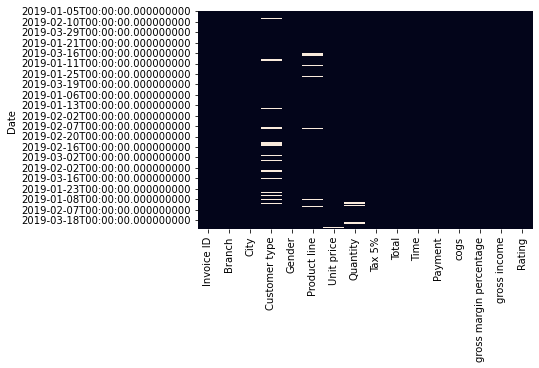

In [38]:
sns.heatmap(df.isnull(), cbar=False)

White lines are the values that are missing.

In [39]:
# fill the missing data with mean value
df.fillna(df.mean(), inplace=True)


C:\Users\user\AppData\Local\Temp\ipykernel_22504\1851194643.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.fillna(df.mean(), inplace=True)


In [40]:
# df.mean() will not apply to categorical column such as customer type.
# to fix that, we will replace that missing value with the mode of that particular column

# first, let's see the mode:
df.mode()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,101-17-6199,A,Yangon,Normal,Female,Fashion accessories,55.700292,10.0,4.1540,87.2340,14:42,Ewallet,83.08,4.761905,4.1540,6.0
1,101-81-4070,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.4640,93.7440,19:48,NaN,89.28,NaN,4.4640,NaN
2,102-06-2002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.3770,175.9170,NaN,NaN,167.54,NaN,8.3770,NaN
3,102-77-2261,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0045,189.0945,NaN,NaN,180.09,NaN,9.0045,NaN
4,105-10-6182,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.3260,216.8460,NaN,NaN,206.52,NaN,10.3260,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,894-41-5205,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
996,895-03-6665,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
997,895-66-0685,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
998,896-34-0956,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [41]:
# on the above, what we need is simply this first row, which gives
# the mode for each column.

df.mode().iloc[0]

Invoice ID                         101-17-6199
Branch                                       A
City                                    Yangon
Customer type                           Normal
Gender                                  Female
Product line               Fashion accessories
Unit price                           55.700292
Quantity                                  10.0
Tax 5%                                   4.154
Total                                   87.234
Time                                     14:42
Payment                                Ewallet
cogs                                     83.08
gross margin percentage               4.761905
gross income                             4.154
Rating                                     6.0
Name: 0, dtype: object

In [42]:
df.fillna(df.mode().iloc[0], inplace=True)

<AxesSubplot:ylabel='Date'>

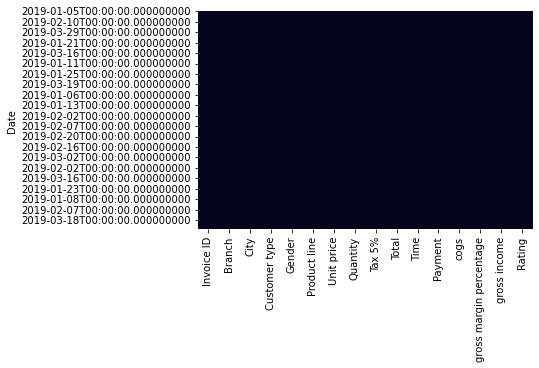

In [43]:
sns.heatmap(df.isnull(), cbar=False)

In [44]:
df.tail()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Time,Payment,cogs,gross margin percentage,gross income,Rating
Date,,,,,,,,,,,,,,,,
2019-01-29,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,55.700292,1.0,2.0175,42.3675,13:46,Ewallet,40.35,4.761905,2.0175,6.2
2019-03-02,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,55.700292,10.0,48.6900,1022.4900,17:16,Ewallet,973.80,4.761905,48.6900,4.4
2019-02-09,727-02-1313,A,Yangon,Member,Male,Food and beverages,55.700292,1.0,1.5920,33.4320,13:22,Cash,31.84,4.761905,1.5920,7.7
2019-02-22,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.820000,1.0,3.2910,69.1110,15:33,Cash,65.82,4.761905,3.2910,4.1
2019-02-18,849-09-3807,A,Yangon,Member,Female,Fashion accessories,88.340000,7.0,30.9190,649.2990,13:28,Cash,618.38,4.761905,30.9190,6.6


In [45]:
# Now let's use the Profiler Report to get an overview report of our data

dataset = pd.read_csv('supermarket_sales.csv')
#prof = ProfileReport(dataset)
#prof

pandas_profiling.ProfileReport(dataset, title='Data report', minimal=True)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

### Task 5: Correlation Analysis

In [46]:
# when you want to find out what the correlation between any
# two columns is, we can use numpy

np.corrcoef(df['gross income'], df['Rating'])

array([[ 1.       , -0.0364417],
       [-0.0364417,  1.       ]])

it's in the negative direction, but it's only negative
-0.03
if you want to get the specific number from this
We simply have to subset it.


In [47]:
round(np.corrcoef(df['gross income'], df['Rating'])[1][0],2)

-0.04

But obviously it's gonna be quite tedious to do this
for every pairwise combination of columns.
So instead we want to look at a correlation matrix instead.

In [48]:
np.round(df.corr(),2)

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
Unit price,1.00,0.01,0.63,0.63,0.63,NaN,0.63,-0.01
Quantity,0.01,1.00,0.70,0.70,0.70,NaN,0.70,-0.02
Tax 5%,0.63,0.70,1.00,1.00,1.00,NaN,1.00,-0.04
Total,0.63,0.70,1.00,1.00,1.00,NaN,1.00,-0.04
cogs,0.63,0.70,1.00,1.00,1.00,NaN,1.00,-0.04
gross margin percentage,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gross income,0.63,0.70,1.00,1.00,1.00,NaN,1.00,-0.04
Rating,-0.01,-0.02,-0.04,-0.04,-0.04,NaN,-0.04,1.00


so here you can see the correlation between cost
of goods sold and unit price is 63% or 0.63. Now a visual
way
of looking at this would be to use seaborn's 
heat map 


<AxesSubplot:>

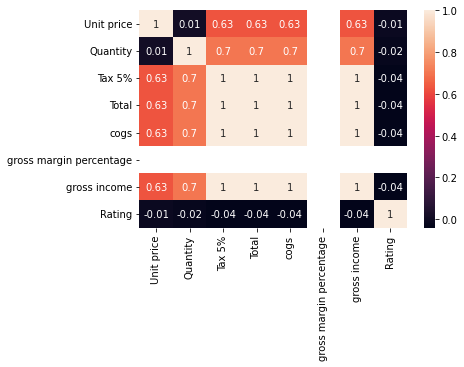

In [49]:
sns.heatmap(np.round(df.corr(),2), annot=True)

Our customer rating has pretty much low correlation
with every other variable in the data set.
It doesn't seem like the amount which a customer spends
on matters for 
shopping experience rating. So that's pretty interesting.
but that's all there is to correlation analysis.


### Helpful Links

1. More visualizations: https://www.data-to-viz.com/
2. Seaborn gallery: https://seaborn.pydata.org/examples/index.html
3. Pandas profiling documentation: https://pypi.org/project/pandas-profiling/